# Assignment 4
Zhuoying Li
1004021202

## Research Question

Our research question for this project is as the following:

- Is there a significant interaction between various groups of individuals (Nondemented, Demented, Converted), time, and the MMSE score?

## Exploratory Data Analysis

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data and display the first few rows
df = pd.read_csv('./INF2178_A4_data.csv')
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [21]:
# Show summary statistics
df.describe()

,Unnamed: 0,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,190.421769,1.489796,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,106.686740,0.500748,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,0.000000,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,99.000000,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,195.500000,1.000000,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,282.750000,2.000000,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,371.000000,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [22]:
# Show unique values for the group column
df['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [23]:
# Check to see if we have any missing values, if so, we will do imputation
# using the mean of the column.
df.isnull().sum()

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [24]:
# Impute missing values for SES and MMSE columns
df['SEC'] = df['SES'].fillna(df['SES'].mean())
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].mean())
df.isnull().sum()

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
SEC            0
dtype: int64

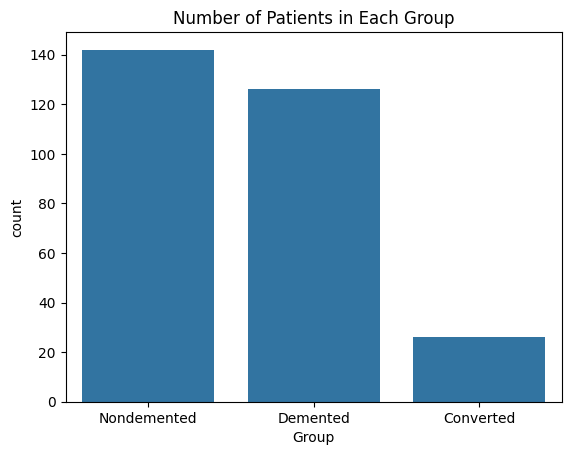

In [25]:
# Draw bargraph of the number of patients in each group
sns.countplot(x='Group', data=df)
plt.title('Number of Patients in Each Group')
plt.show()

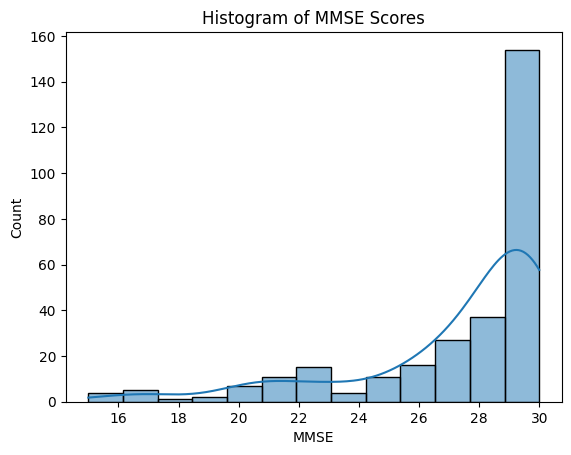

In [26]:
# Draw histogram of the MMSE scores
sns.histplot(df['MMSE'], kde=True)
plt.title('Histogram of MMSE Scores')
plt.show()

In [27]:
# Show unique values in 'Visit' column
df['Visit'].unique()

array([1, 2], dtype=int64)

In [28]:
# Make Visit column a categorical variable
df['Visit'] = df['Visit'].astype('category')

<Axes: xlabel='Visit', ylabel='count'>

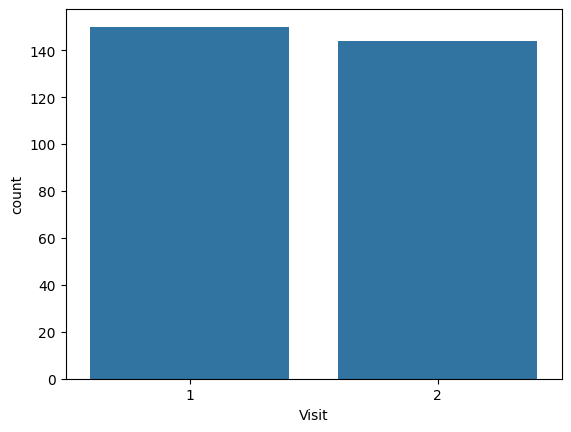

In [29]:
# Draw bargraph of the number of patients in each visit
sns.countplot(x='Visit', data=df)

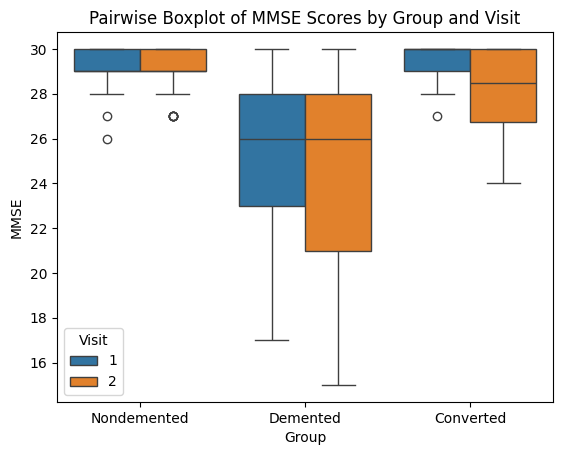

In [30]:
# Pairwise boxplot for MMSE scores by group and visit
sns.boxplot(x='Group', y='MMSE', hue='Visit', data=df)
plt.title('Pairwise Boxplot of MMSE Scores by Group and Visit')
plt.show()

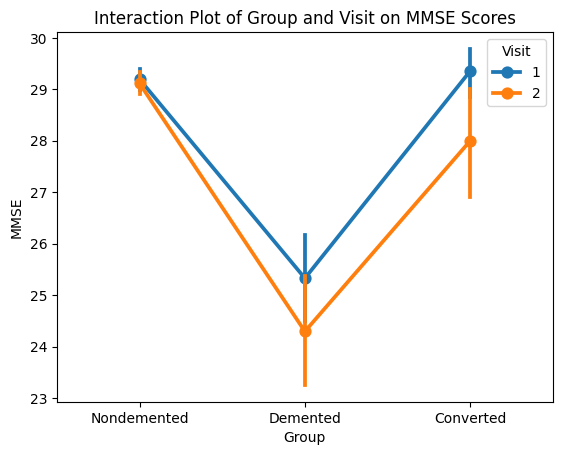

In [31]:
# Draw interaction plot of Group and Visit on MMSE scores
sns.pointplot(x='Group', y='MMSE', hue='Visit', data=df)
plt.title('Interaction Plot of Group and Visit on MMSE Scores')
plt.show()

## Mixed-Effects ANOVA

### Building the Model & Evaluating

In [32]:
# Model to answer the question: Is there a significant interaction between various groups of individuals (Nondemented, Demented, Converted), time, and the MMSE score?
import pingouin as pg

mixed_anova_model = pg.mixed_anova(
    dv='MMSE',
    within='Visit',
    between='Group',
    subject='Subject ID',
    data=df
)
pg.print_table(mixed_anova_model)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1322.017      2    141  661.009  56.100    0.000  0.443  nan
Visit          21.528      1    141   21.528   8.525    0.004  0.057    1.000
Interaction    16.204      2    141    8.102   3.208    0.043  0.044  nan



### Checking Assumptions

In [33]:
# Checking normality of residuals
pg.normality(data=df, dv='MMSE', group='Visit')

,W,pval,normal
Visit,,,
1,0.787462,1.761319e-13,False
2,0.761123,4.942098e-14,False


In [34]:
# Checking homogeneity of variances
pg.homoscedasticity(data=df, dv='MMSE', group='Visit')

,W,pval,equal_var
levene,2.200486,0.139046,True


### Post-Hoc Tests

In [35]:
pg.pairwise_ttests(
    dv='MMSE',
    within='Visit',
    between='Group',
    subject='Subject ID',
    data=df
)

d:\inf2178-a4\venv\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
d:\inf2178-a4\venv\Lib\site-packages\pingouin\pairwise.py:593: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats["Time"].fillna("-", inplace=True)


,Contrast,Visit,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Visit,-,1,2,True,True,2.875706,143.000000,two-sided,4.648185e-03,4.793,0.159217
1,Group,-,Converted,Demented,False,True,6.744844,50.479696,two-sided,1.441732e-08,2.189e+06,1.164072
2,Group,-,Converted,Nondemented,False,True,-1.302773,12.315304,two-sided,2.164867e-01,0.599,-0.583618
3,Group,-,Demented,Nondemented,False,True,-9.511779,65.514176,two-sided,5.813251e-14,3.306e+13,-1.744699
4,Visit * Group,1,Converted,Demented,False,True,8.075525,60.164789,two-sided,3.576357e-11,4.479e+08,1.319205
5,Visit * Group,1,Converted,Nondemented,False,True,0.488598,13.998626,two-sided,6.326918e-01,0.336,0.167118
6,Visit * Group,1,Demented,Nondemented,False,True,-9.123660,68.184593,two-sided,1.972696e-13,3.993e+12,-1.668947
7,Visit * Group,2,Converted,Demented,False,True,4.514900,33.371925,two-sided,7.490317e-05,693.697,0.890687
8,Visit * Group,2,Converted,Nondemented,False,True,-1.815516,11.801968,two-sided,9.491896e-02,1.126,-0.936718
9,Visit * Group,2,Demented,Nondemented,False,True,-8.480387,66.145468,two-sided,3.603765e-12,1.265e+11,-1.554495


## Power Test

In [40]:
from statsmodels.stats.power import TTestIndPower

power_analysis = TTestIndPower()
power_analysis.solve_power(
    effect_size = 0.7,
    alpha = 0.05,
    power = 0.91
)

45.45073088927253

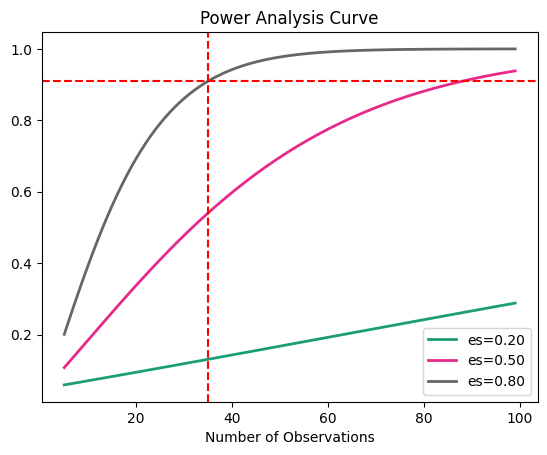

In [43]:
# Plot the power analysis curve
power_analysis.plot_power(dep_var='nobs', nobs=np.array(range(5, 100)), effect_size=np.array([0.2, 0.5, 0.8]))
plt.title('Power Analysis Curve')
# Add X and Y lines
plt.axhline(y=0.91, color='r', linestyle='--')
plt.axvline(x=35, color='r', linestyle='--')
plt.show()